# First Decision Tree 🌳🌴

In [1]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
from sklearn.model_selection import train_test_split

### 1. Loading Dataset

In [2]:
titanic_dataset = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'

In [3]:
titanic = pd.read_csv(titanic_dataset, header=0, sep=',')
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [4]:
# Deleting fare and name column, they do not provide value to our RandomClassifier.
columns_to_drop = ['Name', 'Fare']
titanic.drop(columns=columns_to_drop, axis=1, inplace=True)

In [5]:
titanic.head(3)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0


In [6]:
titanic.columns = ['survived', 'p_class', 'sex', 'age', 'sib_sp', 'par_ch']
titanic.head(3)

,survived,p_class,sex,age,sib_sp,par_ch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0


In [7]:
titanic.shape

(887, 6)

In [8]:
titanic.dtypes

survived      int64
p_class       int64
sex          object
age         float64
sib_sp        int64
par_ch        int64
dtype: object

In [9]:
titanic = pd.get_dummies(titanic, columns=['sex'], drop_first=True)
titanic.dtypes

survived      int64
p_class       int64
age         float64
sib_sp        int64
par_ch        int64
sex_male      uint8
dtype: object

In [10]:
titanic.rename(columns={'sex_male': 'sex'}, inplace=True)

### 2. Training decision tree.

In [11]:
X = titanic.drop("survived", axis=1)
y = titanic.survived

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000) # Search for random_state.

In [13]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Training.
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### 3. Evaluating the model

In [14]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy in train is: {train_accuracy:.4f}")
print(f"Accuracy in test is: {test_accuracy:.4f}")

Accuracy in train is: 0.8048
Accuracy in test is: 0.7640


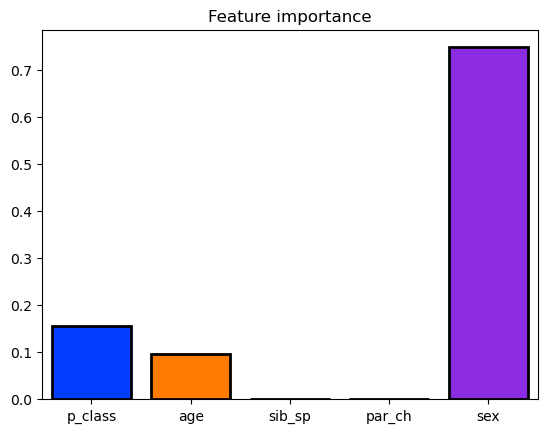

In [16]:
# Feature importances
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Feature importance')
plt.show()